In [1]:
import numpy
import scipy.stats
import pandas
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [2]:
data = pandas.read_csv("https://risk-engineering.org/static/data/TLS-weather-data-2013.csv")
data.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-1-1,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-1-2,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2,2013-1-3,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
3,2013-1-4,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-1-5,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306


In [3]:
data.columns


Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

In [4]:
assert(0 < len(data) <= 365)
for index, day in data.iterrows():
    assert(day["Max TemperatureC"] >= day["Mean TemperatureC"] >= day["Min TemperatureC"])
    assert(day["Max Wind SpeedKm/h"] >= day["Mean Wind SpeedKm/h"] >= 0)
    assert(360 >= day["WindDirDegrees"] >= 0)

In [5]:
def FahrenheitToCelsius(F):
    return (F - 32) * 5 / 9.0
# as a basic test, check that our Fahrenheit and Celsius scales intersect at -40
FahrenheitToCelsius(-40)

-40.0

In [6]:
data["Min TemperatureC"].min()


-7

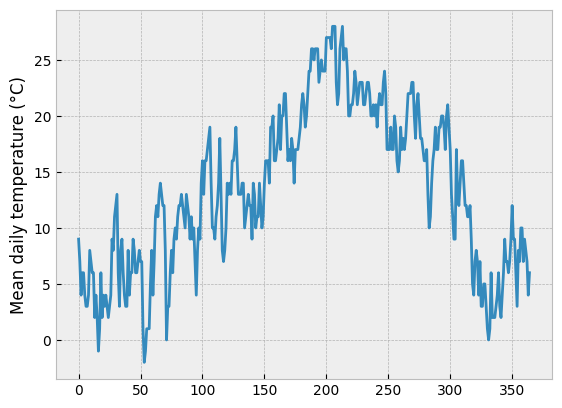

In [7]:
plt.plot(data["Mean TemperatureC"])
plt.ylabel("Mean daily temperature (°C)");

PearsonRResult(statistic=0.007326586609780488, pvalue=0.8890582229326991)

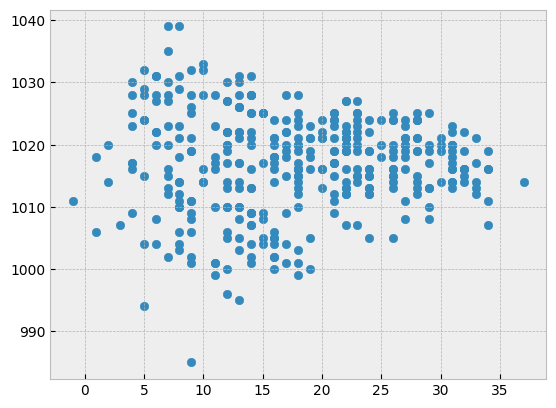

In [8]:
plt.scatter(data["Max TemperatureC"], data["Mean Sea Level PressurehPa"])
scipy.stats.pearsonr(data["Max TemperatureC"], data["Mean Sea Level PressurehPa"])

PearsonRResult(statistic=-0.026087479441801335, pvalue=0.6193473005387747)

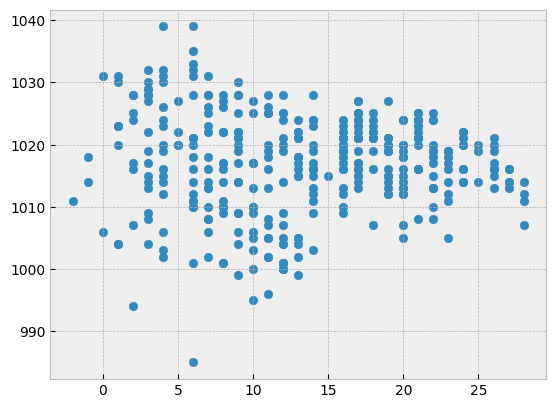

In [9]:
plt.scatter(data["Mean TemperatureC"], data["Mean Sea Level PressurehPa"]);
scipy.stats.pearsonr(data["Mean TemperatureC"], data["Mean Sea Level PressurehPa"])

PearsonRResult(statistic=-0.17492033473927465, pvalue=0.0007899349035989393)

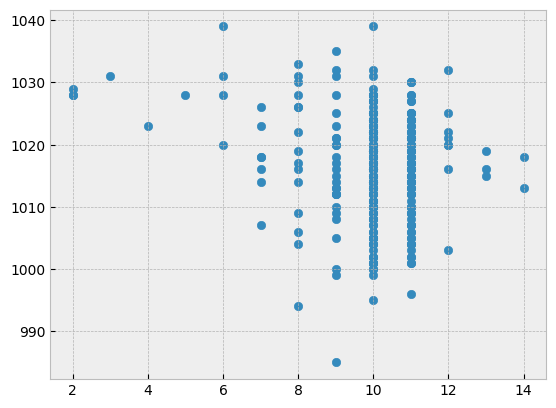

In [10]:
plt.scatter(data["Mean VisibilityKm"], data["Mean Sea Level PressurehPa"])
scipy.stats.pearsonr(data["Mean VisibilityKm"], data["Mean Sea Level PressurehPa"])

PearsonRResult(statistic=0.26244850822084614, pvalue=3.6510407873521086e-07)

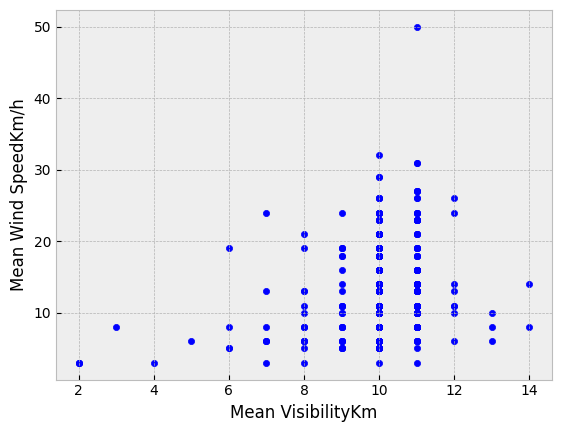

In [11]:
# this is using the plotting functionality in pandas, rather than matplotlib
data.plot(x="Mean VisibilityKm", y="Mean Wind SpeedKm/h", kind="scatter")
scipy.stats.pearsonr(data["Mean VisibilityKm"], data["Mean Wind SpeedKm/h"])

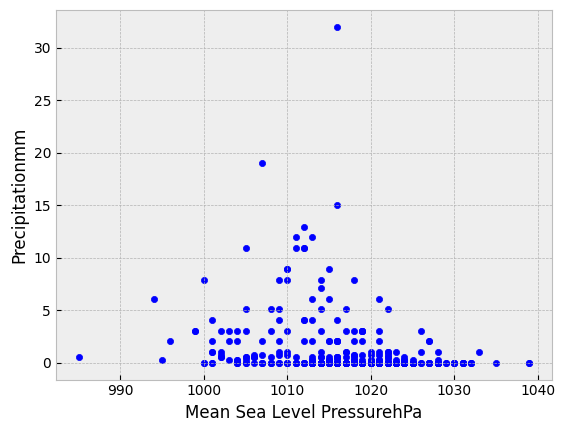

In [12]:
data.plot(x="Mean Sea Level PressurehPa", y="Precipitationmm", kind="scatter");

PearsonRResult(statistic=0.9350261458377362, pvalue=1.5718647760518305e-165)

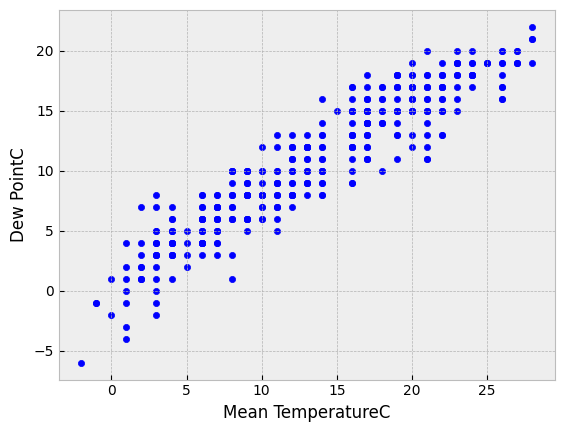

In [13]:
data.plot(x="Mean TemperatureC", y="Dew PointC", kind="scatter")
scipy.stats.pearsonr(data["Mean TemperatureC"], data["Dew PointC"])

In [14]:
# here we generate some fake "observations"
obs = scipy.stats.norm(loc=10, scale=2).rvs(1000)
scipy.stats.norm.fit(obs)

(9.956134096619245, 1.9885349224358326)

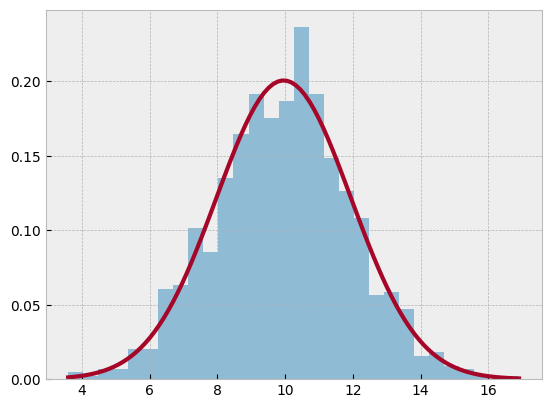

In [15]:
mu, sigma = scipy.stats.norm.fit(obs)
fitted = scipy.stats.norm(mu, sigma)
plt.hist(obs, bins=30, density=True, alpha=0.5);
x = numpy.linspace(obs.min(), obs.max(), 100)
plt.plot(x, fitted.pdf(x), lw=3);

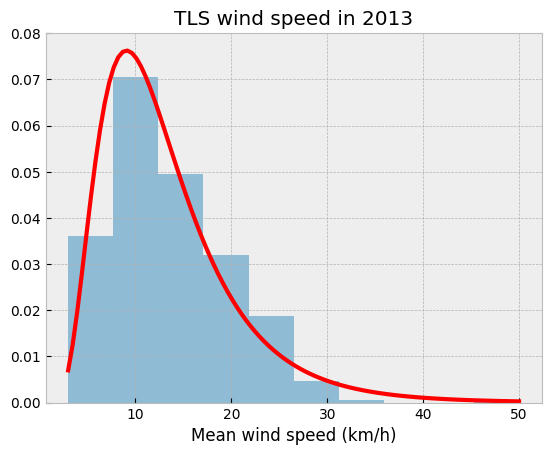

In [16]:
wind = data["Mean Wind SpeedKm/h"]
shape, loc, scale = scipy.stats.lognorm.fit(wind, floc=0)
fitted = scipy.stats.lognorm(shape, loc, scale)
plt.hist(wind, density=True, alpha=0.5)
support = numpy.linspace(wind.min(), wind.max(), 100)
plt.plot(support, fitted.pdf(support), "r-", lw=3)
plt.title("TLS wind speed in 2013")
plt.xlabel("Mean wind speed (km/h)");

KstestResult(statistic=0.9986501019683699, pvalue=0.0, statistic_location=3, statistic_sign=-1)

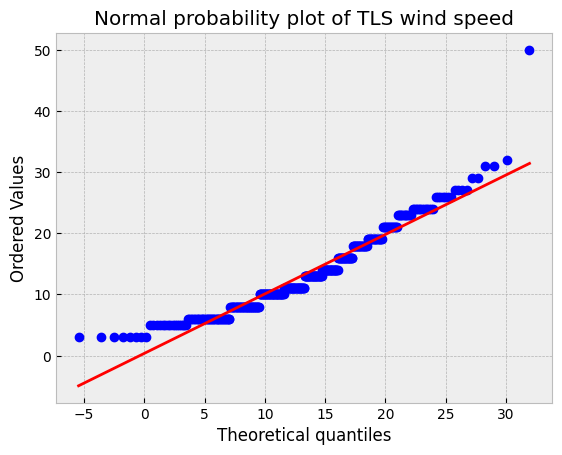

In [17]:
wind = data["Mean Wind SpeedKm/h"]
mu, sigma = scipy.stats.norm.fit(wind)
fitted = scipy.stats.norm(mu, sigma)
scipy.stats.probplot(wind, dist=fitted, plot=plt.figure().add_subplot(111))
plt.title("Normal probability plot of TLS wind speed")
# also run a Kolmogorov-Smirnov test to measure goodness of fit
scipy.stats.kstest(wind, "norm")

KstestResult(statistic=0.09352227664560753, pvalue=0.0031423028181509485, statistic_location=10, statistic_sign=-1)

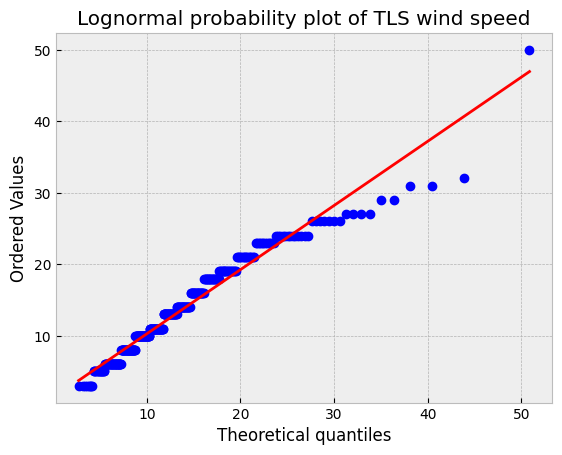

In [18]:
fitted = scipy.stats.lognorm(shape, loc, scale)
scipy.stats.probplot(wind, dist=fitted, plot=plt.figure().add_subplot(111))
plt.title("Lognormal probability plot of TLS wind speed")
scipy.stats.kstest(wind, "lognorm", (shape,loc,scale))

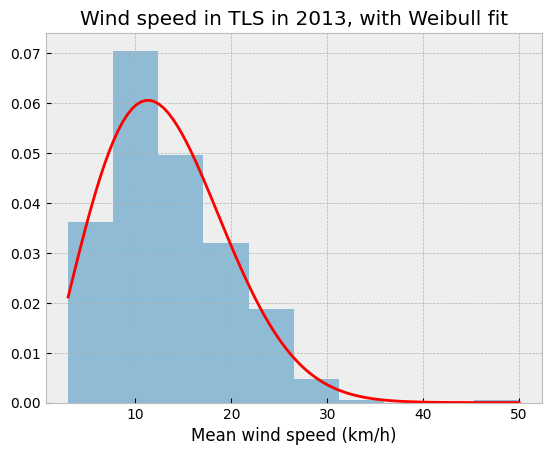

In [19]:
p0, p1, p2 = scipy.stats.weibull_min.fit(wind, floc=0)
fitted = scipy.stats.weibull_min(p0, p1, p2)
plt.hist(wind, density=True, alpha=0.5)
plt.plot(support, fitted.pdf(support), "r-", lw=2)
plt.title("Wind speed in TLS in 2013, with Weibull fit")
plt.xlabel("Mean wind speed (km/h)");

KstestResult(statistic=0.10271595910846454, pvalue=0.0008326519475570719, statistic_location=11, statistic_sign=1)

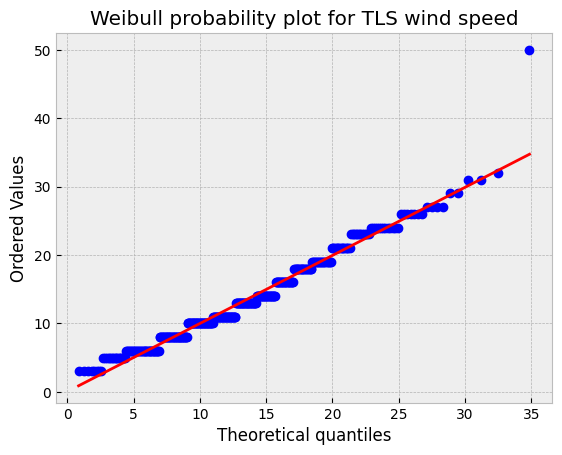

In [20]:
scipy.stats.probplot(wind, dist=fitted, plot=plt.figure().add_subplot(111))
plt.title("Weibull probability plot for TLS wind speed")
scipy.stats.kstest(wind, "weibull_min", args=(p0, p1, p2))